# Homework #6
# CP 8.1, 8.2, 8.3, 8.7, 8.16a, b
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
21 March 2018 

In [44]:
from numpy import sin, linspace, loadtxt, array, zeros, arange, copy
from math import pi, floor, exp, cos, sin, sqrt
from pylab import legend, xlabel, ylabel, title, imshow, plot, xlim, ylim, jet, gray, show, axis
from scipy import signal
import matplotlib
'''
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline
'''
from time import time

## 8.1 Low pass filter

We have a simple electronic circuit with one resisor and one capacitor. The circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right. 

Using Ohm's law and the capacitor law and assuming that the output load has very high impedence, so that a negligible amount of current flows through it, we write down the equations governing this circuit as follows: 


$$ IR = V_{in} - V_{out} $$ 
$$ Q  = CV_{out} $$ 
$$ I = \frac{dQ}{dt} $$ 

where I is the current that flows through R into the capcitor, and Q is the charge on the capacitor 

Substituting the second equation into the third, then substituting the result into the first equation, we find: 

$$ \frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in} - V_{out}) $$ 

We will write a program to solve this equation for $V_out(t)$ using the fourth order Runge-Kutta method when the input signal is a square wave with frequency 1 and amplitude 1: 

$$ V_{in}(t) 
= 
\begin{cases}
1, & \text{if } \lfloor 2t \rfloor \text{ is even,}\\
-1, & \text{if}\ \lfloor 2t \rfloor \text{ is odd,}
\end{cases}$$ 

In [46]:
u = arange(0, 10, 10/100) 

# stores array of vales of f(t)
values = zeros(len(u))
N = len(u)
for i in range(0, N, 1): 
    if floor(2*u[i]) % 2 == 0: 
        values[i] = 1 
    else:
        values[i] = -1

#print(values)
#plot(u, values)
title("Square wave")

Text(0.5,1,'Square wave')

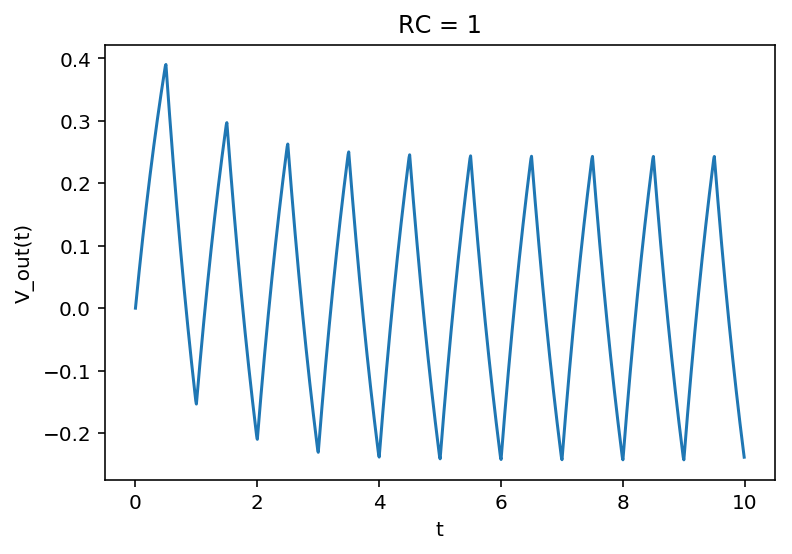

In [100]:
#rk4.py

# Possible RC values 
#RC = 0.01 
#RC = 0.1 
RC = 1 

# Let vout = x 

def f(x,t):
    '''
    Returns dV_out / dt given
    x, t, and constant RC based 
    on a square wave input signal
    '''
    if floor(2*t) % 2 == 0: 
        vin = 1 
    else:
        vin = -1
    return (1/RC)*(vin - x)

a = 0.0        # Start of the interval
b = 10.0       # End of the interval 
N = 1000       # Number of steps 
h = (b-a)/N    # Size of a single step 

tpoints = arange(a,b,h) 
xpoints = []
x = 0.0        # Initial condition 
        
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
plot(tpoints, xpoints)
#print(xpoints)
title("RC = 1")
xlabel("t")
ylabel("V_out(t)")
show()

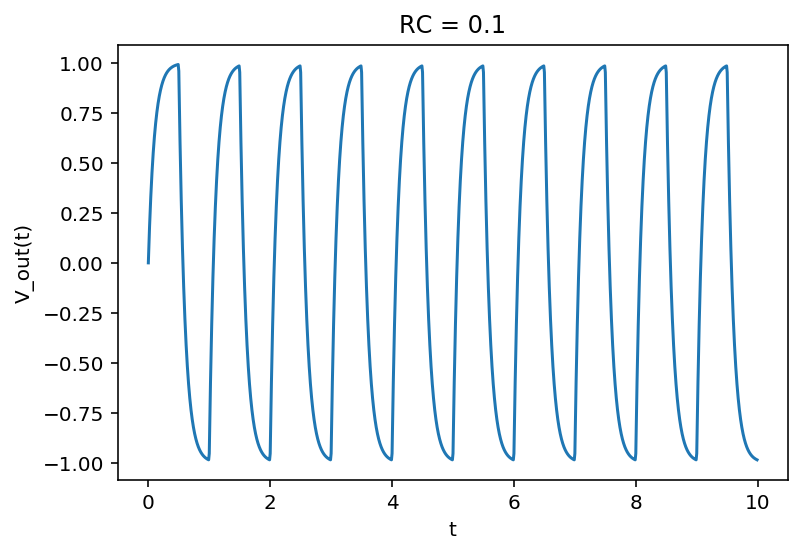

In [99]:
#rk4.py

# Possible RC values 
#RC = 0.01 
RC = 0.1 
#RC = 1 

# Let vout = x 

def f(x,t):
    '''
    Returns dV_out / dt given
    x, t, and constant RC based 
    on a square wave input signal
    '''
    if int(2*t) % 2 == 0: 
        vin = 1 
    else:
        vin = -1
    return (1/RC)*(vin - x)

a = 0.0        # Start of the interval
b = 10.0       # End of the interval 
N = 1000       # Number of steps 
h = (b-a)/N    # Size of a single step 

tpoints = arange(a,b,h) 
xpoints = []
x = 0.0        # Initial condition 
        
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
plot(tpoints, xpoints)
#print(xpoints)
title("RC = 0.1")
xlabel("t")
ylabel("V_out(t)")
show()

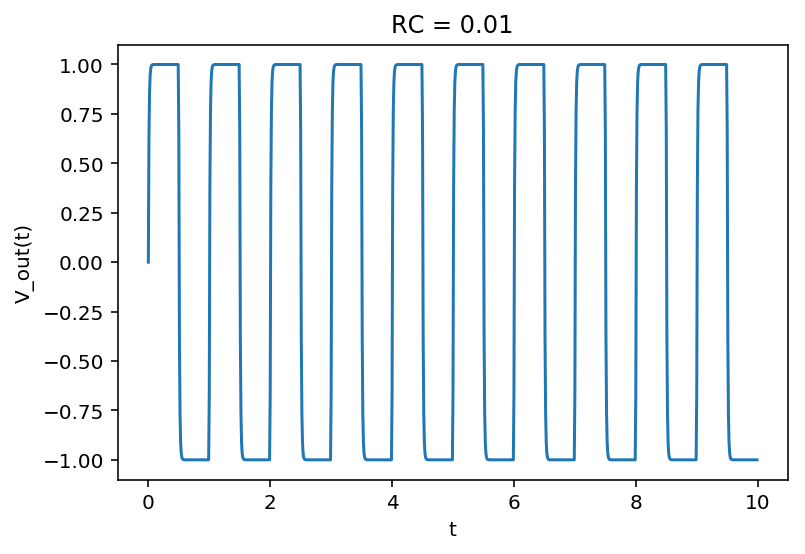

In [98]:
#rk4.py

# Possible RC values 
RC = 0.01 
#RC = 0.1 
#RC = 1 

# Let vout = x 

def f(x,t):
    '''
    Returns dV_out / dt given
    x, t, and constant RC based 
    on a square wave input signal
    '''
    if floor(2*t) % 2 == 0: 
        vin = 1 
    else:
        vin = -1
    return (1/RC)*(vin - x)

a = 0.0        # Start of the interval
b = 10.0       # End of the interval 
N = 1000         # Number of steps 
h = (b-a)/N    # Size of a single step 

tpoints = arange(a,b,h) 
xpoints = []
x = 0.0        # Initial condition 
        
for t in tpoints:
    xpoints.append(x)
    #print(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
plot(tpoints, xpoints)
#print(xpoints)
title("RC = 0.01")
xlabel("t")
ylabel("V_out(t)")
show()

## 8.2 Rabbits and Foxes!

In the Lotka-Volterra model (Predator-prey interactions between biological species) the rabbits (the prey) reproduce at a rate proportional to their population, but are eaten by the foxes (the predator) at a rate proportional to both their own population and the population of foxes: 

$$ \frac{dx}{dt} = \alpha x - \beta xy $$ 

where $\alpha$ anad $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat the rabbits -- because they need food to grow and reproduce -- but also die of old age at a rate proportional to their own population: 

$$ \frac{dy}{dt} = \gamma x y = \delta y $$ 

where $\gamma$  and $\delta$ are also constants 

We write a program that solves these equations using the fourth-rder Runge-Kutta method for the case 

$$\alpha = 1$$
$$\beta = 0.5$$ 
$$\gamma = 0.5$$
$$\delta = 0.2$$ 

starting at $x=y=2$. We will show the graph showing $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.

In [30]:
# Define constants 
alpha = 1 
beta = 0.5 
gamma = 0.5 
delta = 2 

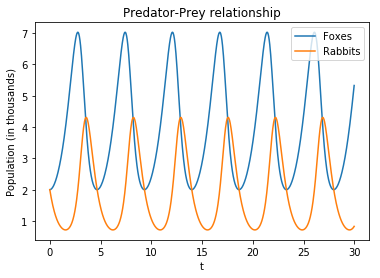

In [39]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return array([fx,fy],float)

a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0,2.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints, label = "Foxes")
plot(tpoints,ypoints, label = "Rabbits")
xlabel("t")
ylabel("Population (in thousands)")
title("Predator-Prey relationship")
legend(loc = "upper right")
show()

### What's going on? 

From t=0, as the population of foxes increases, the population of the rabbits decreases. And this makes sense. There are more foxes to eat rabbits. Eventually, as the population of rabbits begins to wane, so does the population of foxes. This also makes sense. The fewer number of rabbits, the less prey for the foxes (more foxes die from starvation, higher competition, etc.) and the population of foxes begin to decline. Then, as the rate of decrease of the foxes is the most negative (most foxes lost per unit time), the population of rabbits has been soaring and the population of the rabbits reaches its maximum. This makes sense. Less foxes means more surviving rabbits. But with all things in nature, balance must be restored. More rabbits means more prey for the foxes and the population of foxes once again begins to increase. Nature is always a fair arbitrator. 

## 8.3 The Lorenz equation and chaos


One of the most celebrated sets of differential equations in physics is the Lorenz equations: 

$$\frac{dx}{dt} = \sigma(y-x), \qquad \frac{dy}{dt} = rx - y - xz, \qquad \frac{dz}{dt} = xy - bz$$

where $\sigma$, $r$, and $b$ are constants 

These are famous because they are one of the first incontrovertible examples of _deterministic chaos_, the occurence of apparently random motion even though there is no randomness built into the equations. 

We write a progrma to solve the Lorenz equations for the case: 

$$\sigma = 10$$ 
$$r = 28$$ 
$$b = \frac{8}{3}$$

In [105]:
# Define constants 

s = 10
R = 28 
B = 8/3

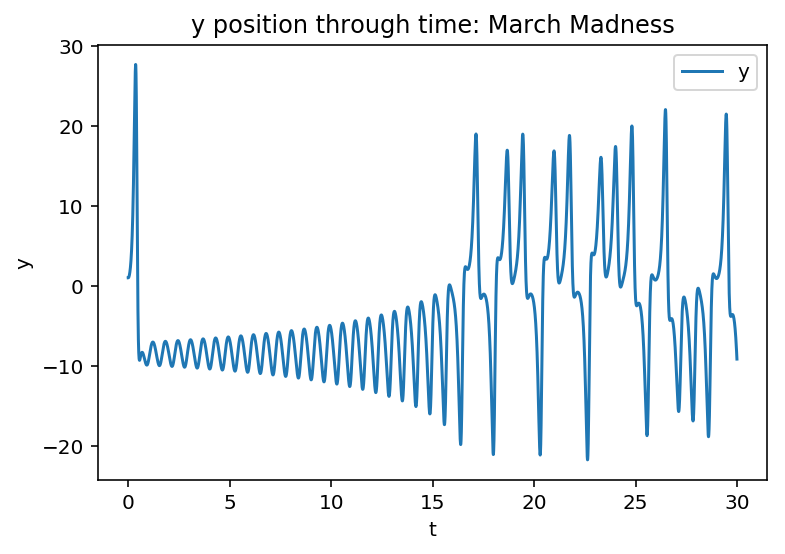

In [109]:
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = s*(y-x)
    fy = R*x - y - x*z
    fz = x*y - B*z
    return array([fx,fy,fz],float)

a = 0.0
b = 30.0
N = 10000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = array([0.0,1.0, 0.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
#plot(tpoints,xpoints, label = "x")
plot(tpoints,ypoints, label = "y")
#plot(tpoints,zpoints, label = "z")
xlabel("t")
ylabel("y")
title("y position through time: March Madness") # Considering 
legend(loc = "upper right")
show()

### Plotting z against x 

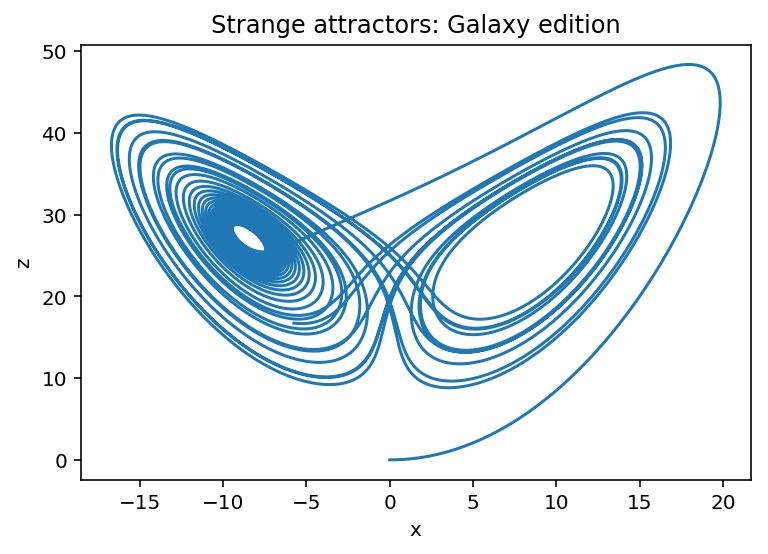

In [111]:
plot(xpoints,zpoints)
xlabel("x")
ylabel("z")
title("Strange attractors: Galaxy edition") 
show()

## 8.7 Trajectory with air resistance

Consider a spherical cannonball shot from a cannon standing on level ground. The air resistance on a moving sphere is a force in the opposite direction to the motion with magnitude: 

$$F = \frac{1}{2}\pi R^2\rho C v^2 $$ 

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the velocity, and $C$ is the so-called _coefficient of drag_ (a property of the moving object, in this case a sphere) 

Starting from Newton's second law, $F = ma$, we derive the equations of motion for the position $(x,y)$ of the cannonball.

There are two forces acting on the cannonball: $F_{drag}$ and $F_{g}$

We split $F_{drag}$ into its components 

$$F_x = F_{drag}, \qquad F_y = F_{drag} + F_{g}$$

$$ma_x = F_{drag}, \qquad ma_y = F_{drag} + F_{g}$$

Solving for the x component of acceleration by dividing by mass: 

$$ a_x = -\frac{\pi R^2 \rho C}{2m}v_{x}^{2}$$ 

We replace $v_x$ with $\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$ and $a_x = \ddot{x}$

$$\ddot{x} = -\frac{\pi R^2 \rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$$ 

The same procedure can be done with F_y: 

$$ a_y = -g -\frac{\pi R^2 \rho C}{2m}v_{y}^{2}$$ 

We replace $v_y$ with $\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$ and $a_y = \ddot{y}$

$$\ddot{y} = -g - \frac{\pi R^2 \rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$

Therefore: 

$$\ddot{x} = -\frac{\pi R^2 \rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}, \qquad \ddot{y} = -g - \frac{\pi R^2 \rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}, $$


where $m$ is the mass of the cannonball, $g$ is the acceleration due to gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ with respect to time.

We change these two-second order equation into four first-order equations, write a program that solves the equations with these specifications, and plot the result: 

Let 

$$ \frac{dx}{dt} = w, \qquad \frac{dy}{dt} = z$$ 

With substitution

$$\frac{dw}{dt} = -\frac{\pi R^2 \rho C}{2m}w\sqrt{w^2 + z^2}, \qquad \frac{dz}{dt} = -g - \frac{\pi R^2 \rho C}{2m}z\sqrt{w^2 + z^2} $$

Using the given constants:

$$m = 1kg, R = 0.08m, \theta = 30 \text{ degrees}, v_0 = 100 ms^{-1}, \rho = 1.22 kg m^{-3}, C = 0.47$$


In [117]:
# Define constants 

m = 1        # kg 
R = 0.08     # meters 
theta = pi/6 # radians 
v0 = 100     # m/s (initial velocity)
rho = 1.22   # kg / m^3 (density of air)
C = 0.47     # coefficient of drag 
g = 9.81     # m/s^2


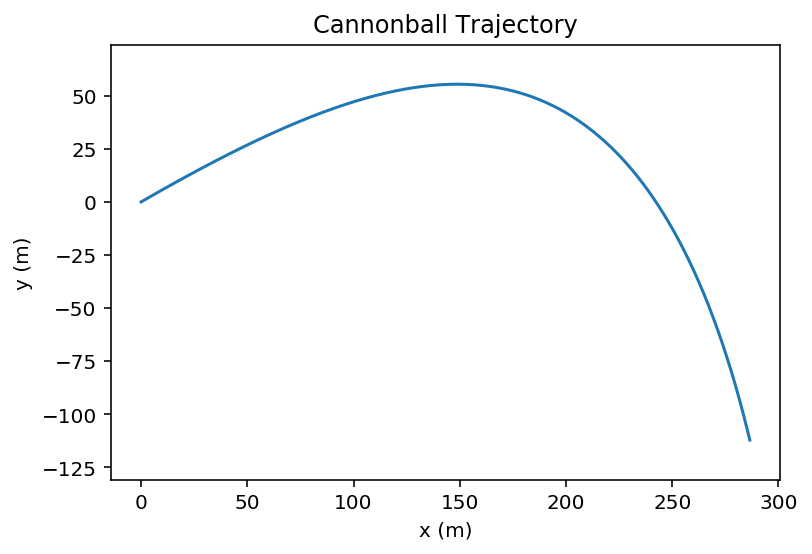

In [125]:
def f(r,t):
    x = r[0]
    y = r[1]
    w = r[2]
    z = r[3]
    fx = w
    fy = z 
    fw = -(pi*(R**2)*rho*C/(2*m))*w*sqrt(w**2 + z**2)
    fz = -g - (pi*(R**2)*rho*C/(2*m))*z*sqrt(w**2 + z**2)
    return array([fx,fy,fw,fz],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []
wpoints = []
zpoints = []

r = array([0.0,0.0, v0*cos(theta), v0*sin(theta)],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    wpoints.append(r[2])
    zpoints.append(r[3])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plot(xpoints,ypoints, label = "x")
xlabel("x (m)")
#xlim((0,300))
ylabel("y (m)")
#ylim(-150, 75)
axis('equal')
title("Cannonball Trajectory") 
show()

### How does the mass affect the distance traveled? 

Ignoring air resistance, distance traveled by a projectile does not depend on the mass of the projectile. In real life, however, mass certainly does make a difference. We will estimate the total distance traveled (over horizontal ground) by the cannonball from above, and then determine whether the cannonball travels further if it is heavier or lighter. 

We will: 
1) plot a series of trajectories for cannonballs of different masses 
2) make a graph of distance traveled as a function of mass 

How would you make this into a function of m? 
How would you plot multiple trajectories onto one graph. 

In [56]:
# Define constants 

#m = 100
#m = 10
#m = 1        # kg
m = 0.1
#m = 0.01
R = 0.08     # meters 
theta = pi/6 # radians 
v0 = 100     # m/s (initial velocity)
rho = 1.22   # kg / m^3 (density of air)
C = 0.47     # coefficient of drag 
g = 9.81     # m/s^2


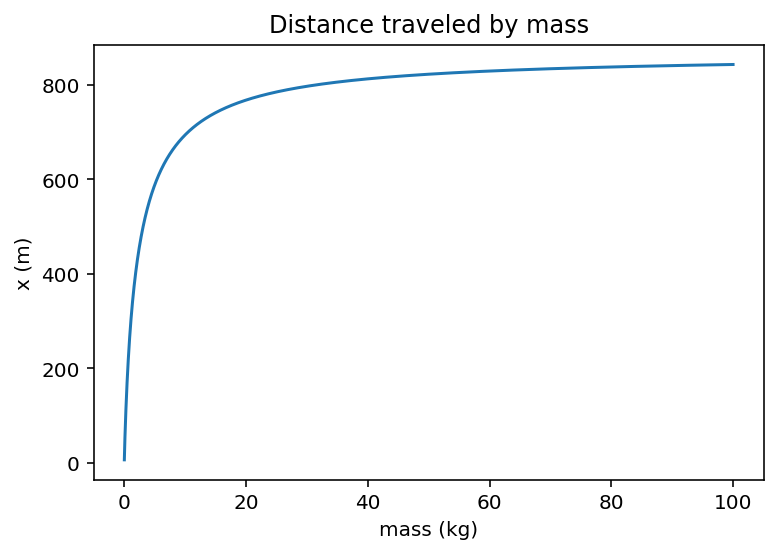

In [57]:
def f(r,t,m):
    x = r[0]
    y = r[1]
    w = r[2]
    z = r[3]
    fx = w
    fy = z 
    fw = -(pi*(R**2)*rho*C/(2*m))*w*sqrt(w**2 + z**2)
    fz = -g - (pi*(R**2)*rho*C/(2*m))*z*sqrt(w**2 + z**2)
    return array([fx,fy,fw,fz],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
mvalues = arange(0.01,100,h)
xpoints = []
ypoints = []
wpoints = []
zpoints = []
xmaxes = []

r = array([0.0,0.0, v0*cos(theta), v0*sin(theta)],float)
for i, mass in enumerate(mvalues):
    '''
    if i%100 == 0: 
        print(i/10, "%")
    '''
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        wpoints.append(r[2])
        zpoints.append(r[3])
        k1 = h*f(r,t,mass)
        k2 = h*f(r+0.5*k1,t+0.5*h,mass)
        k3 = h*f(r+0.5*k2,t+0.5*h,mass)
        k4 = h*f(r+k3,t+h,mass)
        r += (k1+2*k2+2*k3+k4)/6
    xmax = max(xpoints)
    #print(xmax)
    xpoints = []
    r = array([0.0,0.0, v0*cos(theta), v0*sin(theta)],float)
    xmaxes.append(xmax)
  
plot(mvalues,xmaxes)
xlabel("mass (kg)")
ylabel("x (m)")
title("Distance traveled by mass") 
show()


### What's going? 

As the cannonball's mass increases, the plot of the distance traveled appears to be logarithmic. Since we are only increasing the mass and not the radius of the cannonball, we expect that the cannonball will travel further as the mass gets bigger, but only significantly up to a certain point. This is because gravity has a mass term in the numerator, while the drag has a mass term in the denominator. 

## 8.16 a and b The three-body problem [worth two problems] 

Given three stars that are in initially at rest with the following masses and positions in arbitrary units

$$ Star 1 -> m = 150, x = 3, y = 1 $$
$$ Star 2 -> m = 200, x = -1, y = -2 $$
$$ Star 3 -> m = 250, x = -1, y = 1 $$

We show that the equation of motion governing the position __r1__ of the first star is 

$$\frac{d^2r_1}{dt^2} = Gm_2\frac{r_2 - r_1}{|r_2 - r_1|^3} + Gm_3\frac{r_3 - r_1}{|r_3 - r_1|^3}$$

Starting with Newton's 2nd Law:

$$m_1a_1 = F_2 + F_3$$

where $F_2 = \frac{Gm_2m_1}{r^2}\hat{r}$ and $F_3 = \frac{Gm_3}{r^2}\hat{r}$

Substituting in $F_2$ and $F_3$ and dividing by $m_1$

$$a_1 = \frac{Gm_2}{r^2}\hat{r} + \frac{Gm_3}{r^2}\hat{r}$$

We can rewrite __r__ in terms of the positions of the bodies in relation to the origin, and we can rewrite the unit vector 

$$a_1 = \frac{Gm_2}{|r_2-r_1|^2}\frac{r_2-r_1}{|r_2-r_1|} + \frac{Gm_3}{|r_3-r_1|^2}\frac{r_3-r_1}{|r_3-r_1|}$$

Finally, rewriting it to make it a little clearer: 

$$\frac{d^2r_1}{dt^2} = Gm_2\frac{r_2-r_1}{|r_2-r_1|^3} + Gm_3\frac{r_3-r_1}{|r_3-r_1|^3}$$

A similar method is used to obtain the other two equations for the positions of __r2__ and __r3__, which are:

$$\frac{d^2r_2}{dt^2} = Gm_1\frac{r_1 - r_2}{|r_1 - r_2|^3} + Gm_3\frac{r_3 - r_2}{|r_3 - r_2|^3}$$

$$\frac{d^2r_3}{dt^2} = Gm_1\frac{r_1 - r_3}{|r_1 - r_3|^3} + Gm_2\frac{r_2 - r_3}{|r_2 - r_3|^3}$$

We can convert these three second-order equations into six equivalent first-order equations: 

Let 

$$\frac{dr_1}{dt} = u, \qquad \frac{dr_2}{dt} = v, \qquad \frac{dr_3}{dt} = w$$ 


Substituting 

$$\frac{du}{dt} = Gm_2\frac{r_2 - r_1}{|r_2 - r_1|^3} + Gm_3\frac{r_3 - r_1}{|r_3 - r_1|^3}$$
$$\frac{dv}{dt} = Gm_1\frac{r_1 - r_2}{|r_1 - r_2|^3} + Gm_3\frac{r_3 - r_2}{|r_3 - r_2|^3}$$
$$\frac{dw}{dt} = Gm_1\frac{r_1 - r_3}{|r_1 - r_3|^3} + Gm_2\frac{r_2 - r_3}{|r_2 - r_3|^3}$$



## Solving the equations 

Working in units where G = 1, we write a program to solve the above six equations and hence calculate the motion of the stars from t = 0 to t = 2. We make a plot showing the trails of all three stars 

To do this calcuation properly, we need to use an adaptive step size method. We construct a progam so that it introduces an error of no more than $10^-3$ in the position of any star per unit time 

Here's the general two part method. First we have to esimate the error on our steps, then we compare that error to our required accuracy and either increase or decrease the step size to achieve the accuracy we want. 

Chooose some initial value of h -- typically very small, to be on the safe side -- and, using our ordinary Runge-Kutta method, we first do two steps of the solution, each of size h, one after another. If we start at t, we will after two steps get to time $t + 2h$ and get an estimate for $f(t+2h)$. The clever part is to go back to the start again, to time $t$, and we do one more Runge-Kutta step, but this time of twice the size, i.e., of size $2h$. This third larger step also takes us to time $t + 2h$ and gives us another estimate of $x(t+2h)$, which will usualyl be close to but slightly different from the first esimate, since it was calculated in a different way. It turns out that by comparing the two estimate we can tell how accurate our calculation is. 


0) Set a desired error 
1) We perform two steps of size $h$ and then, from the same place, one step size of $2h$ 
2) This gives us the estimates of x1 and x2 of x(t+2h)
3) use x1 and x2 to calculate rho 
4a) if rho > 1, we are too accurate. it's wasteful but keep going. just make the steps bigger next time. How much bigger is calculated by plugging rho into eq. 8.52 for h'
4b) if rho < 1, we are too inaccurate. we need to repeat the step again, but with a smaller step size and again solving eq. 8.52 for h' will tell us by how much. 
5) since we have two variables 


In [58]:
# Define constants 

delta = 1e-3 # Desired error 
G = 1         # for this case, G = 1 gravitational constant 
m1 = 150      # kg 
m2 = 200      # kg 
m3 = 250      # kg 

In [59]:
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline

def f(r,t):
    x1 = r[0]
    y1 = r[1]
    x2 = r[2]
    y2 = r[3]
    x3 = r[4]
    y3 = r[5]
    u1 = r[6]
    v1 = r[7]
    u2 = r[8]
    v2 = r[9]
    u3 = r[10]
    v3 = r[11]
    fx1 = u1
    fy1 = v1
    fx2 = u2
    fy2 = v2
    fx3 = u3
    fy3 = v3
    R12 = sqrt((x1-x2)**2 + (y1-y2)**2)
    R23 = sqrt((x2-x3)**2 + (y2-y3)**2)
    R31 = sqrt((x3-x1)**2 + (y1-y3)**2)
    fu1 = (G*m2*(x2-x1)/(abs(R12)**3)) + (G*m3*(x3-x1)/(abs(R31)**3))
    fv1 = (G*m2*(y2-y1)/(abs(R12)**3)) + (G*m3*(y3-y1)/(abs(R31)**3))
    fu2 = (G*m1*(x1-x2)/(abs(R12)**3)) + (G*m3*(x3-x2)/(abs(R23)**3))
    fv2 = (G*m1*(y1-y2)/(abs(R12)**3)) + (G*m3*(y3-y2)/(abs(R23)**3))
    fu3 = (G*m1*(x1-x3)/(abs(R31)**3)) + (G*m2*(x2-x3)/(abs(R23)**3))
    fv3 = (G*m1*(y1-y3)/(abs(R31)**3)) + (G*m2*(y2-y3)/(abs(R23)**3))
    return array([fx1,fy1,fx2,fy2,fx3,fy3,fu1,fv1,fu2,fv2,fu3,fv3],float)

a = 0.0  # start time
b = 2.0  # end time
h = 0.00001 # initial h 
t = 0.0  # initial t 

tpoints = []
x1points = []
y1points = []
x2points = []
y2points = []
x3points = []
y3points = []

r = array([3.0,1.0,-1.0,-2.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0],float)

while t < b: 
  
    x1points.append(r[0])
    y1points.append(r[1])
    x2points.append(r[2])
    y2points.append(r[3])
    x3points.append(r[4])
    y3points.append(r[5])
    tpoints.append(t)

    # First step
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r1 = r + (k1+2*k2+2*k3+k4)/6
    
    # Second step 
    
    k1 = h*f(r1,t+h)
    k2 = h*f(r1+0.5*k1,(t+h)+0.5*h)
    k3 = h*f(r1+0.5*k2,(t+h)+0.5*h)
    k4 = h*f(r1+k3,(t+h)+h)
    r2 = r1 + (k1+2*k2+2*k3+k4)/6
    
    # Two step
    
    twoh = 2*h
    k1 = twoh*f(r,t)
    k2 = twoh*f(r+0.5*k1,t+0.5*twoh)
    k3 = twoh*f(r+0.5*k2,t+0.5*twoh)
    k4 = twoh*f(r+k3,t+twoh)
    r3 = r + (k1+2*k2+2*k3+k4)/6
    
    # Calculate error 
    
    epx1 = (1/30)*(r2[0]-r3[0])
    epy1 = (1/30)*(r2[1]-r3[1])
    epx2 = (1/30)*(r2[2]-r3[2])
    epy2 = (1/30)*(r2[3]-r3[3])
    epx3 = (1/30)*(r2[4]-r3[4])
    epy3 = (1/30)*(r2[5]-r3[5])
    eucl1 = sqrt(epx1**2 + epy1**2)
    eucl2 = sqrt(epx2**2 + epy2**2)
    eucl3 = sqrt(epx3**2 + epy3**2)
    maxerror = max([eucl1, eucl2, eucl3])
    
    # calculate rho 
    
    if maxerror > 1e-14: 
        rho = h*delta/maxerror 
        if rho > 1: # good to go onto next step
            r = copy(r2)
            t = t + 2*h
            h = h*min([rho**0.25, 2])
        else: # the error wasn't good enough, go back to initial t 
            h = h*min([rho**0.25, 2])
            for i in range(2):
                k1 = h*f(r,t)
                k2 = h*f(r+0.5*k1,t+0.5*h)
                k3 = h*f(r+0.5*k2,t+0.5*h)
                k4 = h*f(r+k3,t+h)
                r += (k1+2*k2+2*k3+k4)/6
                t += h 
    else:
        r = copy(r2)
        t = t + 2*h
        h = 2*h

## Plot of trails of three stars 

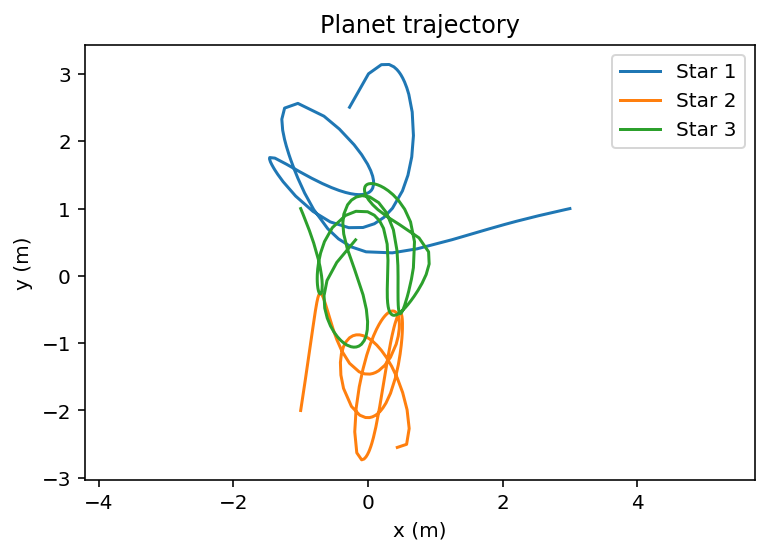

In [55]:
plot(x1points,y1points, label = "Star 1")
plot(x2points,y2points, label = "Star 2")
plot(x3points,y3points, label = "Star 3")
xlabel("x (m)")
ylabel("y (m)")
legend(loc = "upper right")
title("Planet trajectory") 
axis('equal')
show()